<a href="https://colab.research.google.com/github/alimehdi4236/PFG/blob/main/ALI_Task_classifier_adult_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from  sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report
from sklearn import svm
from numpy.random import seed
RAND=3524 # should be your student code abcd
seed(RAND)

from https://drive.google.com/file/d/1-jrwZmZ3kqH-3JbckqbxEsr7EjW27IDJ/view?usp=sharing copy file archive.zip to your folder.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/pooja2512/Adult-Census-Income/refs/heads/master/adult.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


**About the Dataset**
```*Age: Describes the age of individuals. Continuous.
Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: Continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: Number of years spent in education. Continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: Continuous.
capital-loss: Continuous.
hours-per-week: Continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
salary: >50K,<=50K  ---- CLASSIFICATION Target

```



In [ ]:
exclude_atribute=[ "fnlwgt", 'education.num', 'capital.gain', 'capital.loss']
for att in exclude_atribute:
  del df[att]
df.head()


,age,workclass,education,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,?,HS-grad,Widowed,?,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,?,Some-college,Widowed,?,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K


In [5]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observation:
```
We can see that the columns workclass, occupation, and native.country contains null values. We would have to find out a way to deal with them!
There can be many ways to impute missing values, but right now, for the sake of simplicity we would impute them using mode!
```



In [6]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-6-8f8b6f3b2013>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-7-31f1fef8c646>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')


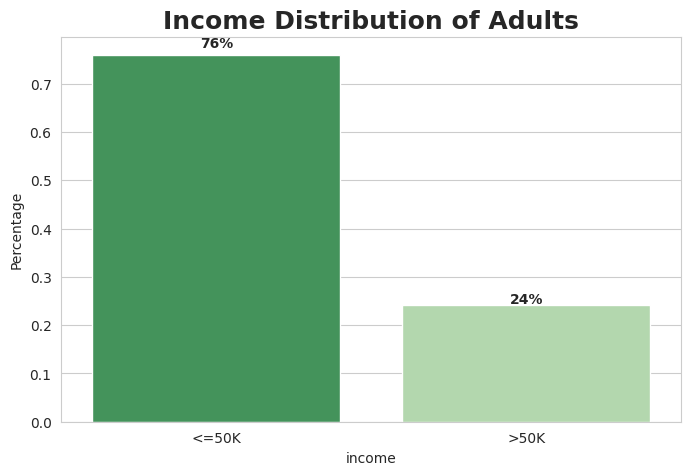

In [7]:
#Before beginning, let us understand a bit about our data.
# to see more statistics wisit https://www.kaggle.com/code/aditimulye/adult-income-dataset-from-scratch
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

Data preparation for a model implementation

In [8]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country','income']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

from sklearn.model_selection import train_test_split
X = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'hours.per.week']]
y = df['income']

#lets split data and do input feature transform.

In [9]:
X_tr, X_te, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RAND, shuffle=True, stratify=y)


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_tr)
X_train=scaler.transform(X_tr)
X_test=scaler.transform(X_te)

## Lets implement the base line model. Your model should work much better :)

In [11]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
scores_nb=metrics.accuracy_score(y_test,y_pred)
print("Base line accuracy = ", scores_nb)

Base line accuracy =  0.762206981267274


In [12]:
#saving model for latter use
from joblib import dump, load
dump(nb_model,'naive_Bayes_clasifier.joblib')

['naive_Bayes_clasifier.joblib']

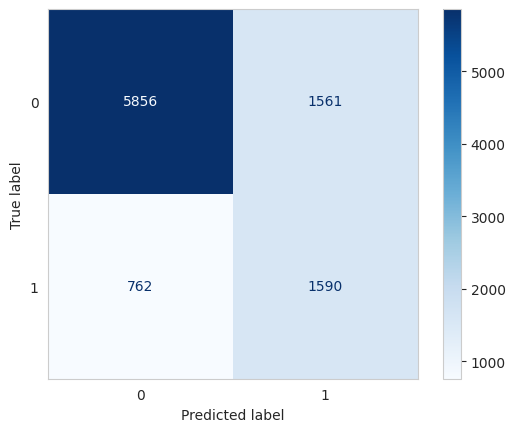

In [13]:
# Plot Confusion matrix
classes = None
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp = disp.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')

plt.grid(False)
plt.show()

In [14]:
print("Base line Naive Baies metrics:")
print("- Accuracy  = %.3f" % accuracy_score(y_test, y_pred))
print("- ROC AUC   = %.3f" % roc_auc_score(y_test, y_pred))
# compute the classification report
print(classification_report(y_test, y_pred))

Base line Naive Baies metrics:
- Accuracy  = 0.762
- ROC AUC   = 0.733
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      7417
           1       0.50      0.68      0.58      2352

    accuracy                           0.76      9769
   macro avg       0.69      0.73      0.71      9769
weighted avg       0.79      0.76      0.77      9769



-----------------------------------------------------------------------
**Now, let's build your model; better than the base line.**
-----------------------------------------------------------------------

**The task 1.**
Depending on the last digit of your student Internal code (abcde) build an "optimal" (i.e. better that the base line) classifier by variating specific *parameter*. Plot the accuracy cure depending on manipulated variable.
The RAND variable is your student ID numbers RAND="bcde".

0. DecisionTreeClassifier(criterion='entropy', random_state=RAND, min_samples_split = `Variate from 2 till 15000 by some step`)
1. DecisionTreeClassifier(criterion='gini', random_state=RAND, max_depth = `Variate from 2 till 100`)
2. KNeighborsClassifier(n_neighbors=`Variate from 2 till 70`, p=2)
3. KNeighborsClassifier(n_neighbors='Variate from 2 till 70', p=1)
4. svm. SVC(random_state=RAND, kernel='linear', C=`Variate from 1 till 100`, tol = 0.01, max_iter = 1000)
5. svm.SVC(random_state=RAND, kernel='rbf', gamma=0.07, C=`Variate from 1 till 100`, tol = 0.01, max_iter = 1000)
6. svm.SVC(random_state=RAND,kernel='poly', degree=3, C=`Variate from 1 till 100`, tol = 0.01, max_iter = 1000)
7. svm.LinearSVC(random_state=RAND,C=`Variate from 1 till 100`, tol = 0.01, max_iter = 1000)
8. MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(`Variate from 1 till 50`,), random_state=RAND)
9. MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(`Variate from 1 till 50`,5), random_state=RAND)

In [19]:
RAND=3524 ## Student ID abcde

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

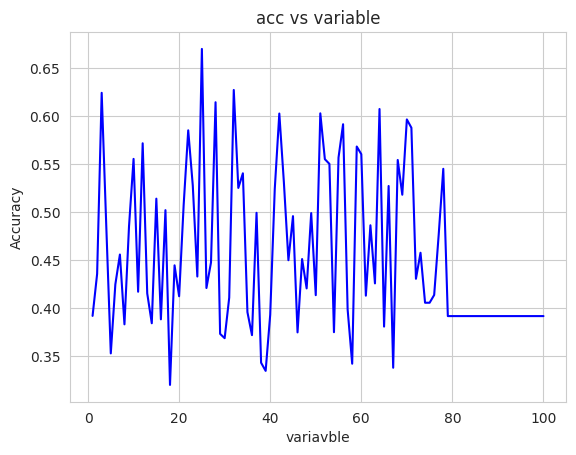

In [20]:
variable_list=list(range(1, 101))
rez=[]
for i in variable_list:
  clf = svm.SVC(random_state=RAND, kernel='linear', C=i, tol=0.01, max_iter=1000).fit(X_train, y_train) #<-line to code
  y_pred = clf.predict(X_test)
  scores=metrics.accuracy_score(y_test,y_pred)
  rez.append(scores)

plt.plot(variable_list, rez, c ="blue")
plt.title('acc vs variable')
plt.xlabel('variavble')
plt.ylabel('Accuracy')
# To show the plot
plt.show()



Task 2. Find variable with maximum and minimum accuracy;
Train 2 classifiers ACC_min and ACC_max, Plot confusion matrix'es and calculate metrics

In [21]:
max_i=variable_list[np.argmax(rez)]
min_i=variable_list[np.argmin(rez)]
clf_max = svm.SVC(random_state=RAND, kernel='linear', C=i, tol=0.01, max_iter=1000).fit(X_train, y_train) # -- to code
clf_min = svm.SVC(random_state=RAND, kernel='linear', C=i, tol=0.01, max_iter=1000).fit(X_train, y_train) # -- to code
y_pred_max = clf_max.predict(X_test)
y_pred_min = clf_min.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [22]:
dump(clf_max, 'ACC_max_Model.joblib')
dump(clf_min, 'ACC_min_Model.joblib')

['ACC_min_Model.joblib']

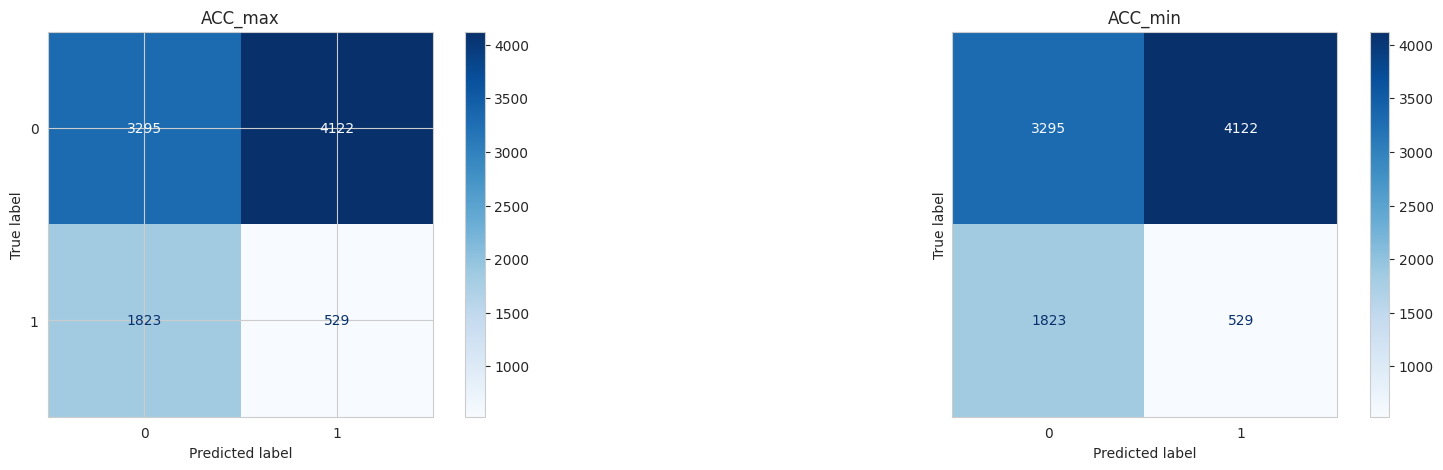

In [23]:
#plot confusion matrixes of max min classifiers
f, axes = plt.subplots(1, 2, figsize=(20, 5), sharey='row')
cm = confusion_matrix(y_test, y_pred_max, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp = disp.plot(ax=axes[0], include_values=True, cmap='Blues',  xticks_rotation='horizontal')
disp.ax_.set_title('ACC_max')
plt.grid(False)

cm = confusion_matrix(y_test, y_pred_min, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp = disp.plot(ax=axes[1], include_values=True, cmap='Blues', xticks_rotation='horizontal')
disp.ax_.set_title('ACC_min')
plt.grid(False)

plt.subplots_adjust(wspace=0.40, hspace=0.1)
plt.show()

In [24]:
# show accuracy metrics for clf_max and clf_min classifiers
print("Classification Report for ACC_max:")
print(classification_report(y_test, y_pred_max))

print("\nClassification Report for ACC_min:")
print(classification_report(y_test, y_pred_min))

Classification Report for ACC_max:
              precision    recall  f1-score   support

           0       0.64      0.44      0.53      7417
           1       0.11      0.22      0.15      2352

    accuracy                           0.39      9769
   macro avg       0.38      0.33      0.34      9769
weighted avg       0.52      0.39      0.44      9769


Classification Report for ACC_min:
              precision    recall  f1-score   support

           0       0.64      0.44      0.53      7417
           1       0.11      0.22      0.15      2352

    accuracy                           0.39      9769
   macro avg       0.38      0.33      0.34      9769
weighted avg       0.52      0.39      0.44      9769



Task 3: Load and stack 3 classifiers for ensamble learning (http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/)

In [26]:
# Load 3 saved models
model1=load('naive_Bayes_clasifier.joblib')
model2=load('ACC_max_Model.joblib')
model3=load('ACC_min_Model.joblib')

In [27]:
from sklearn import model_selection
estimators = [('nb', model1),  ('clf_max', model2), ('clf_min', model3)]
clf_stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())


print('3-fold cross validation:\n')

for clf, label in zip([model1, model2, model3, clf_stack],
                      ['Naive Bayes',
                       'clf_max',
                       'clf_min',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_train, y_train,
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.3f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))



3-fold cross validation:

Accuracy: 0.759 (+/- 0.01) [Naive Bayes]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.437 (+/- 0.01) [clf_max]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.437 (+/- 0.01) [clf_min]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

Accuracy: 0.792 (+/- 0.00) [StackingClassifier]


Show confusion matrix of stacked classifiers "clf_stack" and print the statistics



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

<Figure size 1000x700 with 0 Axes>

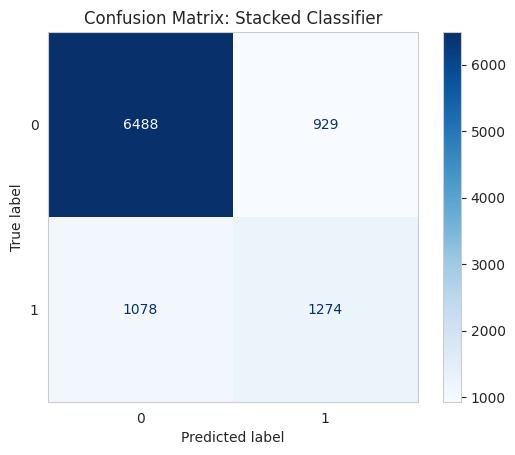

Classification Report for Stacked Classifier:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      7417
           1       0.58      0.54      0.56      2352

    accuracy                           0.79      9769
   macro avg       0.72      0.71      0.71      9769
weighted avg       0.79      0.79      0.79      9769



In [30]:
clf_stack.fit(X_train, y_train)

y_pred_stack = clf_stack.predict(X_test)

# Confusion matrix
cm_stack = confusion_matrix(y_test, y_pred_stack)
disp_stack = ConfusionMatrixDisplay(confusion_matrix=cm_stack, display_labels=np.unique(y_test))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
disp_stack.plot(cmap='Blues', xticks_rotation='horizontal')
plt.title("Confusion Matrix: Stacked Classifier")
plt.grid(False)
plt.show()

# Print classification report
print("Classification Report for Stacked Classifier:")
print(classification_report(y_test, y_pred_stack))

Task 4. **Bonus**. Change *standart* scaler to *minmax* scaler for data preprocessing and reapeat all the task and extarct the conclusions.